<a href="https://colab.research.google.com/github/paluigi/AI-IoT-Bootcamp/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
%tensorflow_version 1.x
import tensorflow as tf

%matplotlib inline

TensorFlow 1.x selected.


Import dataset

In [2]:
!git clone https://github.com/paluigi/AI-IoT-Bootcamp.git

fatal: destination path 'AI-IoT-Bootcamp' already exists and is not an empty directory.


Load dataset into pandas dataframe

In [3]:
data_df = pd.read_csv("/content/AI-IoT-Bootcamp/datasets/text_emotions/text_emotion.csv")
data_df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


# Summary of dataset

Dataset size

In [4]:
data_df.shape

(40000, 4)

Number of different *labels*

In [5]:
print(data_df["sentiment"].unique())
print(str(len(data_df["sentiment"].unique())) + " different labels")

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']
13 different labels


In [6]:
tot = data_df.shape[0]
for label in data_df["sentiment"].unique():
  t = sum(label == data_df["sentiment"])
  print(str(t) + " occurrences of " + label + " over total " + str(tot) + " occurrences (" + str(round((t/tot)*100, 2)) + "%)")

827 occurrences of empty over total 40000 occurrences (2.07%)
5165 occurrences of sadness over total 40000 occurrences (12.91%)
759 occurrences of enthusiasm over total 40000 occurrences (1.9%)
8638 occurrences of neutral over total 40000 occurrences (21.59%)
8459 occurrences of worry over total 40000 occurrences (21.15%)
2187 occurrences of surprise over total 40000 occurrences (5.47%)
3842 occurrences of love over total 40000 occurrences (9.61%)
1776 occurrences of fun over total 40000 occurrences (4.44%)
1323 occurrences of hate over total 40000 occurrences (3.31%)
5209 occurrences of happiness over total 40000 occurrences (13.02%)
179 occurrences of boredom over total 40000 occurrences (0.45%)
1526 occurrences of relief over total 40000 occurrences (3.82%)
110 occurrences of anger over total 40000 occurrences (0.27%)


In [7]:
sent_dict = {}
tot = data_df.shape[0]
for label in data_df["sentiment"].unique():
  t = sum(label == data_df["sentiment"])
  sent_dict[label] = {"count": t, "perc": round((t/tot)*100, 2)}

In [8]:
sent_dict

{'anger': {'count': 110, 'perc': 0.27},
 'boredom': {'count': 179, 'perc': 0.45},
 'empty': {'count': 827, 'perc': 2.07},
 'enthusiasm': {'count': 759, 'perc': 1.9},
 'fun': {'count': 1776, 'perc': 4.44},
 'happiness': {'count': 5209, 'perc': 13.02},
 'hate': {'count': 1323, 'perc': 3.31},
 'love': {'count': 3842, 'perc': 9.61},
 'neutral': {'count': 8638, 'perc': 21.59},
 'relief': {'count': 1526, 'perc': 3.82},
 'sadness': {'count': 5165, 'perc': 12.91},
 'surprise': {'count': 2187, 'perc': 5.47},
 'worry': {'count': 8459, 'perc': 21.15}}

In [9]:
c = 0
for sent in sent_dict:
  c += sent_dict[sent]["perc"]
print(c)

100.00999999999999


(array([5992.,  759., 8638., 8459., 2187., 5618., 1323., 5209.,  179.,
        1636.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

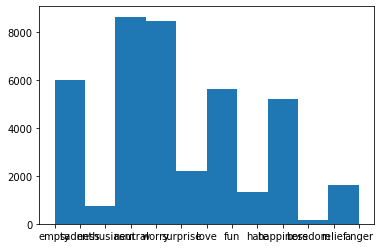

In [10]:
plt.hist(data_df["sentiment"])

# Divide dataset between train and test

In [11]:
train_all_df, test_df = train_test_split(data_df, test_size = 0.2)

Divide train_all dataset in train e dev


In [12]:
train_df, dev_df = train_test_split(train_all_df, test_size = 0.05)

Check basic figures for train, dev, and test datasets

In [13]:
sent_dict_train = {}
tot = train_df.shape[0]
for label in train_df["sentiment"].unique():
  t = sum(label == train_df["sentiment"])
  sent_dict_train[label] = {"count": t, "perc": round((t/tot)*100, 2)}
print(sent_dict_train)

{'sadness': {'count': 3903, 'perc': 12.84}, 'love': {'count': 2915, 'perc': 9.59}, 'hate': {'count': 1040, 'perc': 3.42}, 'neutral': {'count': 6596, 'perc': 21.7}, 'worry': {'count': 6402, 'perc': 21.06}, 'relief': {'count': 1189, 'perc': 3.91}, 'fun': {'count': 1352, 'perc': 4.45}, 'boredom': {'count': 135, 'perc': 0.44}, 'empty': {'count': 630, 'perc': 2.07}, 'enthusiasm': {'count': 574, 'perc': 1.89}, 'surprise': {'count': 1632, 'perc': 5.37}, 'happiness': {'count': 3953, 'perc': 13.0}, 'anger': {'count': 79, 'perc': 0.26}}


In [14]:
sent_dict_dev = {}
tot = dev_df.shape[0]
for label in dev_df["sentiment"].unique():
  t = sum(label == dev_df["sentiment"])
  sent_dict_dev[label] = {"count": t, "perc": round((t/tot)*100, 2)}
print(sent_dict_dev)

{'neutral': {'count': 345, 'perc': 21.56}, 'relief': {'count': 57, 'perc': 3.56}, 'fun': {'count': 83, 'perc': 5.19}, 'hate': {'count': 56, 'perc': 3.5}, 'worry': {'count': 362, 'perc': 22.62}, 'sadness': {'count': 190, 'perc': 11.88}, 'love': {'count': 129, 'perc': 8.06}, 'enthusiasm': {'count': 27, 'perc': 1.69}, 'happiness': {'count': 216, 'perc': 13.5}, 'surprise': {'count': 91, 'perc': 5.69}, 'empty': {'count': 31, 'perc': 1.94}, 'boredom': {'count': 11, 'perc': 0.69}, 'anger': {'count': 2, 'perc': 0.12}}


In [15]:
sent_dict_test = {}
tot = test_df.shape[0]
for label in test_df["sentiment"].unique():
  t = sum(label == test_df["sentiment"])
  sent_dict_test[label] = {"count": t, "perc": round((t/tot)*100, 2)}
print(sent_dict_test)

{'surprise': {'count': 464, 'perc': 5.8}, 'worry': {'count': 1695, 'perc': 21.19}, 'love': {'count': 798, 'perc': 9.98}, 'sadness': {'count': 1072, 'perc': 13.4}, 'enthusiasm': {'count': 158, 'perc': 1.98}, 'neutral': {'count': 1697, 'perc': 21.21}, 'relief': {'count': 280, 'perc': 3.5}, 'empty': {'count': 166, 'perc': 2.08}, 'anger': {'count': 29, 'perc': 0.36}, 'happiness': {'count': 1040, 'perc': 13.0}, 'hate': {'count': 227, 'perc': 2.84}, 'fun': {'count': 341, 'perc': 4.26}, 'boredom': {'count': 33, 'perc': 0.41}}


In [16]:
print(str(len(train_df["sentiment"].unique())) + " different labels in Train Dataset")

13 different labels in Train Dataset


In [17]:
print(str(len(dev_df["sentiment"].unique())) + " different labels in Dev Dataset")

13 different labels in Dev Dataset


In [18]:
print(str(len(test_df["sentiment"].unique())) + " different labels in Test Dataset")

13 different labels in Test Dataset


# Download BERT and related files

In [19]:
!git clone https://github.com/google-research/bert.git

fatal: destination path 'bert' already exists and is not an empty directory.


Chose one BERT model from [this page](https://github.com/google-research/bert).

In [20]:
!wget https://storage.googleapis.com/bert_models/2020_02_20/uncased_L-8_H-512_A-8.zip
!unzip uncased_L-8_H-512_A-8.zip

--2020-08-26 07:51:13--  https://storage.googleapis.com/bert_models/2020_02_20/uncased_L-8_H-512_A-8.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154608092 (147M) [application/zip]
Saving to: ‘uncased_L-8_H-512_A-8.zip.1’

uncased_L-8_H-512_A 100%[===================>] 147.45M   180MB/s    in 0.8s    

2020-08-26 07:51:14 (180 MB/s) - ‘uncased_L-8_H-512_A-8.zip.1’ saved [154608092/154608092]

Archive:  uncased_L-8_H-512_A-8.zip
replace bert_model.ckpt.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [21]:
import os
os.mkdir("bert_output")
os.mkdir("data")

FileExistsError: ignored

Format Dataframes according to BERT preferences
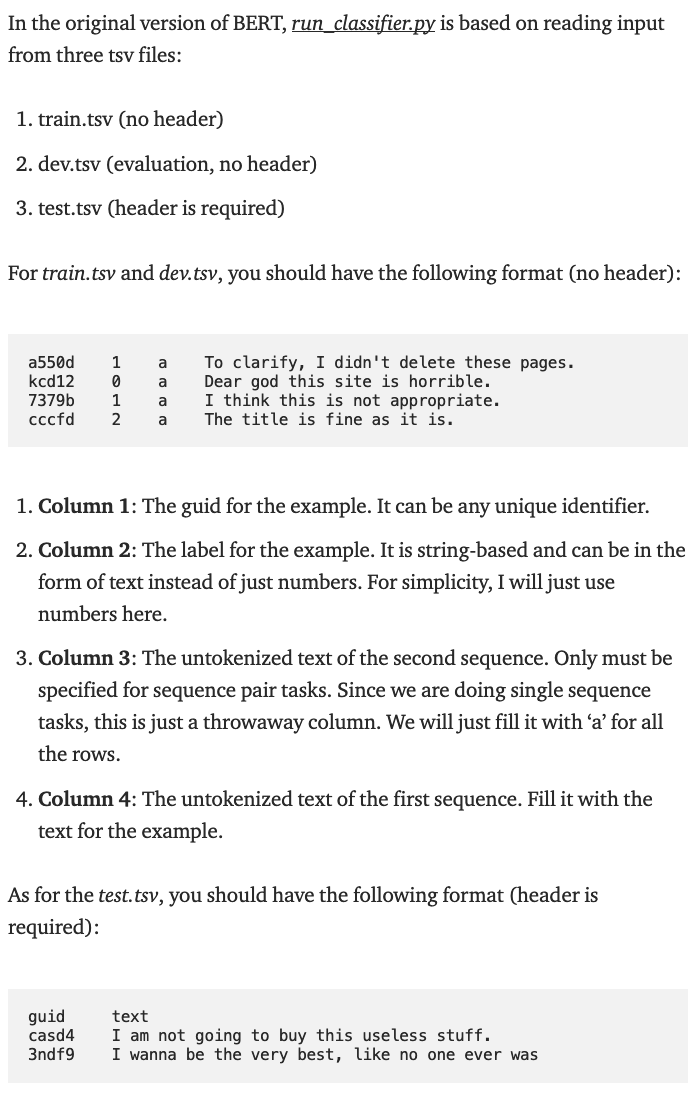

In [22]:
bert_test_df = df_bert = pd.DataFrame({'guid': test_df['tweet_id'],
                                       'label': test_df['sentiment'],
                                       'alpha': ['a']*test_df.shape[0],
                                       'text': test_df['content']})

In [23]:
train_df.to_csv('data/train.tsv', sep='\t', index=False, header=False)
dev_df.to_csv('data/dev.tsv', sep='\t', index=False, header=False)
bert_test_df.to_csv('data/test.tsv', sep='\t', index=False, header=True)

Load modified run_classfier.py file

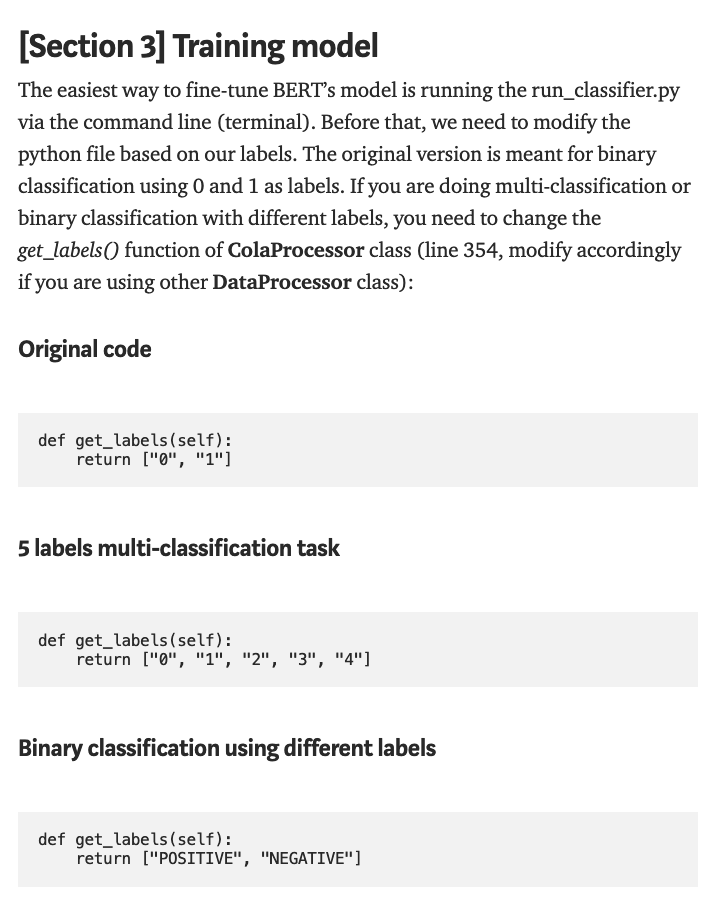

  def get_labels(self):
  
    """See base class."""
    return ['empty','sadness','enthusiasm','neutral','worry','surprise','love',
            'fun','hate','happiness','boredom','relief','anger']


In [ ]:
!python bert/run_classifier.py --task_name=cola --do_train=true --do_eval=true --data_dir=data --vocab_file=vocab.txt --bert_config_file=bert_config.json --init_checkpoint=bert_model.ckpt.index --max_seq_length=64 --train_batch_size=100 --learning_rate=2e-5 --num_train_epochs=3.0 --output_dir=bert_output --do_lower_case=False --save_checkpoints_steps=999999999




W0826 08:40:39.293015 139815509993344 module_wrapper.py:139] From bert/run_classifier.py:785: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0826 08:40:39.293263 139815509993344 module_wrapper.py:139] From bert/run_classifier.py:785: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0826 08:40:39.293760 139815509993344 module_wrapper.py:139] From /content/bert/modeling.py:93: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0826 08:40:39.295176 139815509993344 module_wrapper.py:139] From bert/run_classifier.py:809: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensor